# Regularization Demo
Copyright Machine Learning Plus

__Objective:__ 

Predict the total number of violent crimes per 100k population based on 1990 US census, law enforecemtn and crime data. The primary motive is to show the effectiveness of regularization methods in predicting real valued variables.

__About the dataset:__ 

The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.

__Source:__

Creator: Michael Redmond (redmond '@' lasalle.edu); Computer Science; La Salle University; Philadelphia, PA, 19141, USA

Based on 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law Enforcement Management and Administrative Statistics Survey, available from ICPSR at U of Michigan.

For more information visit [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/communities+and+crime)

## Build a linear regression model

In [1]:
import numpy as np 
import pandas as pd

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [ ]:
# Reading from the original dataset

# dataset_meta_url = https://archive.ics.uci.edu/ml/datasets/communities+and+crime
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
# df = pd.read_csv(url, header=None, na_values=['?'])
# df.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
# removing missing values
# df.dropna(inplace=True)
# df.to_csv('crime_df.csv', index = False)

In [2]:
# Import data. row 0 is header.
df = pd.read_csv('./datasets/crime_df.csv', header = 0)
df.head()

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.10,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,0.16,1.00,0.22,0.52,0.10,0.51,0.48,0.39,0.51,0.30,0.29,0.34,0.23,0.13,0.20,0.20,0.30,0.15,0.48,0.30,0.38,0.47,0.37,0.44,0.08,0.73,0.21,0.53,0.50,0.94,0.45,0.49,0.36,0.20,0.25,0.25,0.19,0.61,0.65,0.13,0.73,0.05,0.39,0.39,0.46,0.46,0.21,0.19,0.20,0.18,0.81,0.08,0.22,0.13,0.21,0.33,0.22,0.24,0.10,0.60,0.0,0.22,0.64,0.22,0.79,0.60,0.00,0.40,0.26,0.23,0.23,0.23,0.31,0.32,0.36,0.33,0.52,0.35,0.40,0.23,0.02,0.23,0.80,0.41,0.53,0.80,0.06,0.30,0.93,0.38,0.05,0.21,0.23,0.30,0.61,0.89,0.15,0.01,0.06,0.12,0.10,0.64,0.22,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
2,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,0.26,1.00,0.33,0.55,0.37,0.37,0.39,0.64,0.44,0.32,0.29,0.32,0.23,0.17,0.17,0.24,0.30,0.19,0.34,0.34,0.43,0.24,0.59,0.43,0.38,0.41,0.43,0.36,0.60,0.35,0.68,0.67,0.60,0.60,0.61,0.64,0.61,0.30,0.30,0.08,0.22,0.14,0.31,0.45,0.57,0.64,0.28,0.36,0.41,0.42,0.64,0.35,0.43,0.39,0.56,0.54,0.60,0.47,0.39,0.48,0.5,0.15,0.83,0.49,0.09,0.16,0.73,0.14,0.28,0.31,0.31,0.31,0.40,0.40,0.45,0.40,0.65,0.59,0.21,0.12,0.09,0.38,0.58,0.31,0.48,0.73,0.03,0.08,0.96,0.12,0.05,0.11,0.35,0.08,0.80,0.82,0.04,0.19,0.19,0.18,0.05,0.57,0.36,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
3,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,1.00,0.99,0.28,0.62,0.16,0.36,0.40,0.30,0.45,0.29,0.30,0.35,0.21,0.20,0.33,0.28,0.40,0.76,0.33,0.25,0.39,0.28,0.30,0.59,0.18,0.33,0.35,0.38,0.69,0.41,0.71,0.73,0.47,0.53,0.51,0.59,0.51,0.55,0.56,0.49,0.35,0.16,0.27,0.34,0.40,0.43,0.07,0.07,0.08,0.08,0.90,0.04,0.23,0.20,0.42,0.46,0.40,0.55,0.20,0.49,0.5,1.00,0.60,0.54,0.52,0.44,0.63,0.37,0.23,0.11,0.11,0.13,0.25,0.28,0.32,0.30,0.45,0.41,0.32,0.39,0.36,0.10,0.44,0.45,0.60,0.48,0.25,0.16,0.75,0.19,0.35,0.19,0.38,0.16,0.82,0.70,0.45,0.03,0.05,0.33,0.13,0.57,1.00,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
4,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,0.13,1.00,0.22,0.52,0.44,0.49,0.56,0.41,0.39,0.25,0.25,0.25,0.16,0.07,0.20,0.19,0.22,0.10,0.36,0.29,0.37,0.27,0.33,0.53,0.43,0.47,0.44,0.33,0.48,0.39,0.48,0.50,0.49,0.59,0.61,0.51,0.66,0.68,0.71,0.05,0.26,0.02,0.49,0.59,0.62,0.64,0.11,0.11,0.11,0.10,0.92,0.09,0.27,0.24,0.43,0.48,0.35,0.64,0.12,0.56,0.0,0.09,0.80,0.61,0.45,0.43,0.19,0.34,0.25,0.05,0.04,0.05,0.14,0.17,0.18,0.17,0.44,0.20,0.43,0.05,0.01,0.09,0.72,0.58,0.72,0.64,0.01,0.11,0.98,0.14,0.03,0.14,0.37,0.11,0.84,0.96,0.00,0.00,0.00,0.00,0.02,0.86,0.29,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [3]:
df.shape

(319, 123)

In [4]:
# Defining X and y
X = df.drop('127', axis=1)
y = df['127']

In [5]:
print(y[:10])

0    0.20
1    0.49
2    0.34
3    0.69
4    0.63
5    0.31
6    0.24
7    0.20
8    0.68
9    0.22
Name: 127, dtype: float64


__Split Training and Test Data__

In [6]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

__Build Linear Reg__

In [7]:
# build a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
# Prediction on test data
predictions_test = linreg.predict(X_test)

# Prediction on train data
predictions_train = linreg.predict(X_train)

In [9]:
np.set_printoptions(suppress=True) # to show the full decicals
linreg.coef_

array([-6.05626492,  0.5909411 , -0.09246098, -0.06045729, -0.11256392,
        0.03455008, -1.95884454, -0.75996754,  2.06622646, -0.50096646,
        6.34651423, -0.0095399 ,  0.03183634, -0.60720797, -0.27797553,
       -0.7824347 ,  0.30380963,  0.17838069,  0.06255002,  1.78321536,
       -0.37089549, -0.2929905 , -0.16851068,  0.07235904, -0.10398758,
        0.20525924, -0.21581663, -1.00576793,  1.05952265,  0.00815507,
       -0.50640818, -0.10018298, -0.18320488, -0.00336852, -0.18680364,
        0.32492177,  0.52896547,  0.40384705, -1.46158163, -0.27575783,
       -1.09700707,  2.08560807,  1.0879772 , -1.11137642, -0.3936496 ,
        0.08838275,  0.28538457, -0.1139997 ,  0.31384621,  0.61382951,
       -0.09512769, -0.43376698,  0.13430003, -0.61876481,  0.29588802,
        0.34663591, -0.81716251,  0.61055151,  0.61862763, -1.04861418,
        0.5981603 ,  0.18316059,  1.58475161, -2.94905687,  0.29481083,
        0.37719415, -0.20540484, -0.59566426,  0.23447064,  1.01

#### Model Evaluation

In [10]:
def evaluate_model(y_train, prediction_train, y_test, prediction_test):
    print ("MAE for train data : ", mean_absolute_error(y_train, prediction_train).round(3))
    print ("MAE for test data : ", mean_absolute_error(y_test, prediction_test).round(3))
    print("\n")
    print ("MSE for train data : ", mean_squared_error(y_train, prediction_train).round(3))
    print ("MSE for test data : ", mean_squared_error(y_test, prediction_test).round(3))
    print("\n")
    print ("MAPE for train data : ", mean_absolute_percentage_error(y_train, prediction_train).round(3))
    print ("MAPE for test data : ", mean_absolute_percentage_error(y_test, prediction_test).round(3))

In [11]:
evaluate_model(y_train, predictions_train, y_test, predictions_test)

MAE for train data :  0.074
MAE for test data :  0.202


MSE for train data :  0.009
MSE for test data :  0.078


MAPE for train data :  0.294
MAPE for test data :  0.755


There error in test data is significantly higher than in training data. The gap between train and test mape is about 22% points.

## Ridge Regression

Let's start with the alpha value to be :
- 0.001
- 0.1
- 100

Higher the alpha value, more restriction on the coefficients
Lower the alpha value, linear and ridge regression resembles 

### Ridge Regression alpha = 0.001

In [12]:
ridge_model_1 = Ridge(alpha= 0.001) 
ridge_model_1.fit(X_train, y_train)

Ridge(alpha=0.001)

In [13]:
# Prediction wiht alpha = 0.001
predictions_test_rr1 = ridge_model_1.predict(X_test)
predictions_train_rr1 = ridge_model_1.predict(X_train)

In [14]:
# Model Evaluation
evaluate_model(y_train, predictions_train_rr1, y_test, predictions_test_rr1)

MAE for train data :  0.074
MAE for test data :  0.197


MSE for train data :  0.009
MSE for test data :  0.071


MAPE for train data :  0.288
MAPE for test data :  0.719


The gap between train and test mape has come down.

In [15]:
ridge_model_1.coef_

array([-3.22557538,  0.67108016, -0.11310845, -0.07053596, -0.09327397,
        0.01132102, -1.73713707, -0.49836027,  1.65160072, -0.49509936,
        3.45696671,  0.07906154, -0.10023636, -0.50703162, -0.27853646,
       -0.86353869,  0.36842472,  0.18596355,  0.04093847,  1.63601731,
       -0.2252907 , -0.28976416, -0.18666441,  0.09711314, -0.06883081,
        0.20264381, -0.1850017 , -1.03450207,  0.97559014,  0.05366275,
       -0.60019287, -0.07172853, -0.15668173, -0.05425122, -0.20504213,
        0.3077559 ,  0.58295448,  0.41110971, -0.96022022, -0.2936647 ,
       -0.36025475,  0.83750315,  1.20135442, -0.95940825, -0.55621519,
        0.05138766,  0.28663326, -0.17715192,  0.37609619,  0.57837014,
       -0.09636079, -0.40959889,  0.08655425, -0.5411423 ,  0.28441418,
        0.3256038 , -0.74042977,  0.60592646,  0.43716807, -0.87001071,
        0.53311423,  0.18960821,  1.32400459, -2.6418195 ,  0.0041509 ,
        0.32222498, -0.20456318, -0.51808688,  0.2092249 ,  1.00

### Ridge Regression alpha = 0.1

In [16]:
ridge_model_2 = Ridge(alpha= 0.1) 
ridge_model_2.fit(X_train, y_train)

Ridge(alpha=0.1)

In [17]:
# Prediction wiht alpha = 0.1
predictions_test_rr2 = ridge_model_2.predict(X_test)
predictions_train_rr2 = ridge_model_2.predict(X_train)

In [18]:
# Model Evaluation
evaluate_model(y_train, predictions_train_rr2, y_test, predictions_test_rr2)

MAE for train data :  0.085
MAE for test data :  0.156


MSE for train data :  0.012
MSE for test data :  0.043


MAPE for train data :  0.31
MAPE for test data :  0.509


The difference between training and test mape has further reduced.

### Ridge Regression alpha = 1

In [19]:
ridge_model_3 = Ridge(alpha= 1) 
ridge_model_3.fit(X_train, y_train)

Ridge(alpha=1)

In [20]:
# Prediction wiht alpha = 1
predictions_test_rr3 = ridge_model_3.predict(X_test)
predictions_train_rr3 = ridge_model_3.predict(X_train)

In [21]:
# Model Evaluation
evaluate_model(y_train, predictions_train_rr3, y_test, predictions_test_rr3)

MAE for train data :  0.102
MAE for test data :  0.129


MSE for train data :  0.017
MSE for test data :  0.032


MAPE for train data :  0.333
MAPE for test data :  0.389


### Ridge Regression alpha = 4

In [24]:
ridge_model_4 = Ridge(alpha= 4) 
ridge_model_4.fit(X_train, y_train)

Ridge(alpha=4)

In [25]:
# Prediction wiht alpha = 100
predictions_test_rr4 = ridge_model_4.predict(X_test)
predictions_train_rr4 = ridge_model_4.predict(X_train)

In [26]:
# Model Evaluation
evaluate_model(y_train, predictions_train_rr4, y_test, predictions_test_rr4)

MAE for train data :  0.113
MAE for test data :  0.122


MSE for train data :  0.02
MSE for test data :  0.029


MAPE for train data :  0.365
MAPE for test data :  0.391


Mape has slightly increased now. 

__Compare Coefs__

In [27]:
# Compare Coefs
df_coefs = pd.DataFrame({"lin_reg_coef":linreg.coef_,
              "rid_reg1_coef":ridge_model_1.coef_,
             "rid_reg2_coef":ridge_model_2.coef_,
             "rid_reg3_coef":ridge_model_3.coef_,
             "rid_reg4_coef":ridge_model_4.coef_},
            )

df_coefs.head(15)

,lin_reg_coef,rid_reg1_coef,rid_reg2_coef,rid_reg3_coef,rid_reg4_coef
0,-6.056265,-3.225575,-0.032162,-0.020132,-0.017959
1,0.590941,0.671080,0.252793,0.070530,0.020259
2,-0.092461,-0.113108,-0.050986,0.076294,0.091299
3,-0.060457,-0.070536,-0.142967,-0.095301,-0.086236
4,-0.112564,-0.093274,-0.060100,-0.016364,0.006210
5,0.034550,0.011321,-0.046139,0.020226,0.009800
6,-1.958845,-1.737137,-0.168147,-0.002157,0.002401
7,-0.759968,-0.498360,0.049893,-0.015030,-0.013893
8,2.066226,1.651601,0.027351,-0.015235,-0.009779
9,-0.500966,-0.495099,-0.011848,0.032559,0.024642


__heatmap__

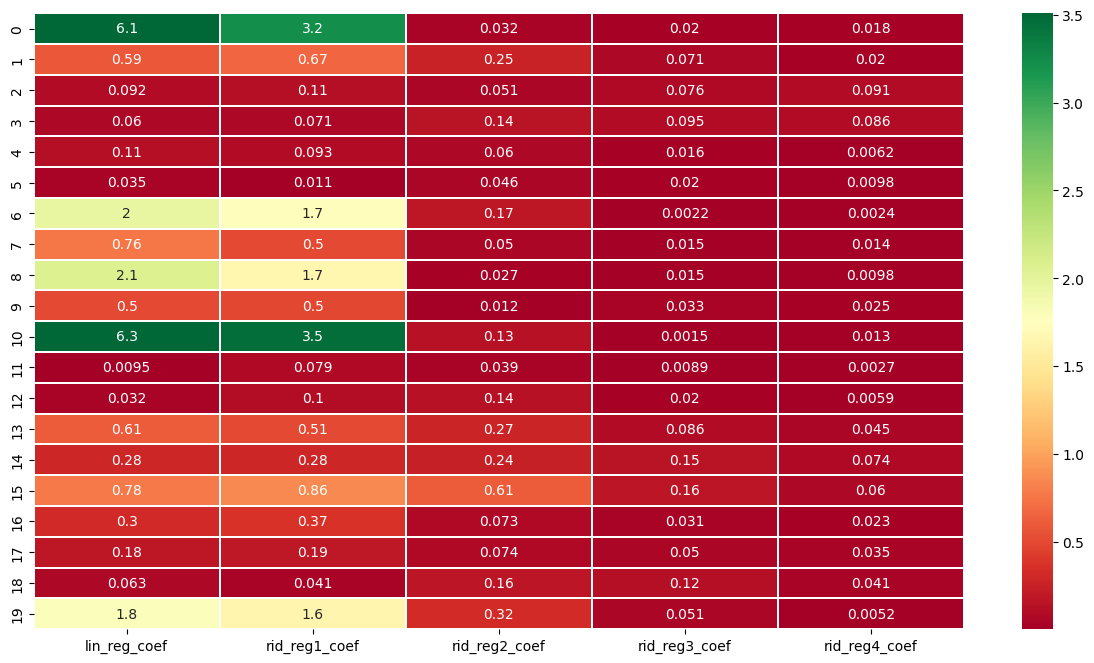

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
sns.heatmap(df_coefs.head(20).abs(), cmap ='RdYlGn', linewidths = 0.30, annot = True, robust=True);

### Gridsearch

We can't manually iterate over the values of alpha, so we use Gridsearch fom sklearn.model selection which tells us the best parameter

In [29]:
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.001,.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 10,100]}
ridreg = Ridge()

Do Gridsearch

In [31]:
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True, scoring="neg_mean_absolute_percentage_error")
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5,
                                   3, 5, 10, 100]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [32]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002264,0.000896,0.001175,0.000165,0.001,{'alpha': 0.001},-0.466905,-0.763918,-0.929568,-0.736818,-1.004511,-0.780344,0.185971,13,-0.269341,-0.243681,-0.264862,-0.218404,-0.255974,-0.250453,0.018264
1,0.001471,0.000182,0.000921,0.000113,0.010,{'alpha': 0.01},-0.471854,-0.615323,-0.832704,-0.579507,-0.877916,-0.675461,0.154915,12,-0.293026,-0.286858,-0.272777,-0.231756,-0.274710,-0.271825,0.021402
2,0.001337,0.000155,0.000791,0.000058,0.100,{'alpha': 0.1},-0.434122,-0.458399,-0.788467,-0.404193,-0.566262,-0.530289,0.140190,10,-0.322111,-0.326932,-0.285562,-0.255452,-0.286103,-0.295232,0.026407
3,0.001172,0.000089,0.000787,0.000102,0.500,{'alpha': 0.5},-0.417646,-0.394917,-0.683410,-0.392426,-0.421607,-0.462001,0.111321,9,-0.344769,-0.347214,-0.293935,-0.284134,-0.303044,-0.314619,0.026316
4,0.001357,0.000175,0.000852,0.000089,0.700,{'alpha': 0.7},-0.410963,-0.396706,-0.658257,-0.396411,-0.412040,-0.454875,0.101911,8,-0.349423,-0.349058,-0.295359,-0.294318,-0.307897,-0.319211,0.024981
5,0.001287,0.000133,0.000712,0.000025,1.000,{'alpha': 1},-0.403734,-0.399792,-0.631499,-0.401925,-0.405600,-0.448510,0.091515,7,-0.354483,-0.350440,-0.298111,-0.306008,-0.313084,-0.324425,0.023411
6,0.001220,0.000077,0.000810,0.000103,1.500,{'alpha': 1.5},-0.398165,-0.401975,-0.603104,-0.408463,-0.400749,-0.442491,0.080378,5,-0.361214,-0.354138,-0.308850,-0.320726,-0.319262,-0.332838,0.020810
7,0.001286,0.000166,0.000789,0.000088,2.000,{'alpha': 2},-0.397442,-0.403256,-0.585824,-0.415363,-0.397241,-0.439825,0.073295,4,-0.369993,-0.360720,-0.317759,-0.331394,-0.324206,-0.340815,0.020706
8,0.001137,0.000063,0.000752,0.000080,2.500,{'alpha': 2.5},-0.397669,-0.404365,-0.574872,-0.420904,-0.393779,-0.438318,0.068904,3,-0.376419,-0.365773,-0.327960,-0.339656,-0.331238,-0.348209,0.019368
9,0.001146,0.000062,0.000739,0.000090,3.000,{'alpha': 3},-0.398045,-0.404990,-0.567581,-0.425205,-0.391317,-0.437428,0.066058,2,-0.381473,-0.370496,-0.336589,-0.346566,-0.337835,-0.354592,0.018137


In [33]:
clf.best_estimator_

Ridge(alpha=5)

__Evaluate on test dataset__

In [34]:
# Evaluating the best alpha suggested by Gridsearch 
rr = Ridge(alpha= 5) 
rr.fit(X_train, y_train)

# Prediction alpha = 5
predictions_test_rr = rr.predict(X_test)
predictions_train_rr = rr.predict(X_train)

# Model Evaluation
evaluate_model(y_train, predictions_train_rr, y_test, predictions_test_rr)

MAE for train data :  0.114
MAE for test data :  0.122


MSE for train data :  0.021
MSE for test data :  0.029


MAPE for train data :  0.373
MAPE for test data :  0.394


Notice now, alpha=5 turned out to be the best model as per mape. But are slightly higher than what was observed in train-test split (with alpha=1). 

But since these numbers are well cross validated, can rely on these.

__Let's do a finer Ridge search around the best estimator region__

In [35]:
params = {"alpha": np.arange(1,10,.1)}
params

{'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
        6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
        7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
        8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])}

In [36]:
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True, scoring="neg_mean_absolute_percentage_error")
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [37]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001536,0.000341,0.000885,0.000111,1.0,{'alpha': 1.0},-0.403734,-0.399792,-0.631499,-0.401925,-0.405600,-0.448510,0.091515,90,-0.354483,-0.350440,-0.298111,-0.306008,-0.313084,-0.324425,0.023411
1,0.001295,0.000088,0.000833,0.000187,1.1,{'alpha': 1.1},-0.401721,-0.400463,-0.624546,-0.403498,-0.404446,-0.446935,0.088816,89,-0.355727,-0.350965,-0.300140,-0.309334,-0.314396,-0.326112,0.022751
2,0.001176,0.000113,0.000758,0.000077,1.2,{'alpha': 1.2000000000000002},-0.400459,-0.400998,-0.618325,-0.404911,-0.403373,-0.445613,0.086371,88,-0.356854,-0.351425,-0.302599,-0.312545,-0.315615,-0.327808,0.021993
3,0.001109,0.000074,0.000680,0.000040,1.3,{'alpha': 1.3000000000000003},-0.399568,-0.401418,-0.612733,-0.406196,-0.402352,-0.444453,0.084168,87,-0.357868,-0.351785,-0.304861,-0.315500,-0.316926,-0.329388,0.021272
4,0.001125,0.000103,0.000754,0.000110,1.4,{'alpha': 1.4000000000000004},-0.398833,-0.401738,-0.607683,-0.407374,-0.401436,-0.443413,0.082182,83,-0.359031,-0.352544,-0.306927,-0.318217,-0.318118,-0.330967,0.020779
5,0.001345,0.000125,0.000791,0.000046,1.5,{'alpha': 1.5000000000000004},-0.398165,-0.401975,-0.603104,-0.408463,-0.400749,-0.442491,0.080378,78,-0.361214,-0.354138,-0.308850,-0.320726,-0.319262,-0.332838,0.020810
6,0.001150,0.000109,0.000710,0.000073,1.6,{'alpha': 1.6000000000000005},-0.397554,-0.402139,-0.598938,-0.409474,-0.400059,-0.441633,0.078753,74,-0.363230,-0.355658,-0.310627,-0.323096,-0.320407,-0.334603,0.020840
7,0.001202,0.000069,0.000794,0.000090,1.7,{'alpha': 1.7000000000000006},-0.397413,-0.402241,-0.595136,-0.411083,-0.399364,-0.441048,0.077186,71,-0.365099,-0.357053,-0.312296,-0.325377,-0.321463,-0.336258,0.020860
8,0.001213,0.000063,0.000765,0.000050,1.8,{'alpha': 1.8000000000000007},-0.397412,-0.402568,-0.591657,-0.412615,-0.398663,-0.440583,0.075725,68,-0.366841,-0.358342,-0.313852,-0.327510,-0.322443,-0.337797,0.020883
9,0.001141,0.000059,0.000764,0.000076,1.9,{'alpha': 1.9000000000000008},-0.397422,-0.402918,-0.588594,-0.414037,-0.397955,-0.440185,0.074444,66,-0.368468,-0.359571,-0.315477,-0.329511,-0.323354,-0.339276,0.020877


In [38]:
clf.best_estimator_

Ridge(alpha=np.float64(5.100000000000003))

Now, __alpha=5.1__ is better.

In [39]:
# Evaluating the best alpha suggested by Gridsearch 
rr = Ridge(alpha= 5.1) 
rr.fit(X_train, y_train)

# Prediction alpha = 10
predictions_test_rr = rr.predict(X_test)
predictions_train_rr = rr.predict(X_train)

# Model Evaluation
evaluate_model(y_train, predictions_train_rr, y_test, predictions_test_rr)

MAE for train data :  0.115
MAE for test data :  0.122


MSE for train data :  0.021
MSE for test data :  0.029


MAPE for train data :  0.374
MAPE for test data :  0.394


## Lasso Regression

Let's start with the alpha value to be :
- 0.001
- 0.01
- 0.1

Higher the alpha value, more restriction on the coefficients
Lower the alpha value, linear and lasso regression resembles 

### Lasso Regression alpha = 0.001

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model_1 = Lasso(alpha=0.001, max_iter=10e5)
lasso_model_1.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=1000000.0)

In [ ]:
# Prediction wiht alpha = 0.001
predictions_test_lasso1 = lasso_model_1.predict(X_test)
predictions_train_lasso1 = lasso_model_1.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_lasso1, y_test, predictions_test_lasso1)

MAE for train data :  0.114
MAE for test data :  0.129


MSE for train data :  0.02
MSE for test data :  0.03


MAPE for train data :  0.365
MAPE for test data :  0.421


### Lasso Regression alpha = 0.01

In [ ]:
lasso_model_2 = Lasso(alpha=0.01, max_iter=10e5)
lasso_model_2.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [ ]:
# Prediction wiht alpha = 0.01
predictions_test_lasso2 = lasso_model_2.predict(X_test)
predictions_train_lasso2 = lasso_model_2.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_lasso2, y_test, predictions_test_lasso2)

MAE for train data :  0.141
MAE for test data :  0.15


MSE for train data :  0.03
MSE for test data :  0.033


MAPE for train data :  0.551
MAPE for test data :  0.638


### Lasso Regression alpha = 0.1

In [ ]:
lasso_3 = Lasso(alpha=0.1, max_iter=10e5)
lasso_3.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=1000000.0)

In [ ]:
# Prediction wiht alpha = 0.1
predictions_test_lasso3 = lasso_3.predict(X_test)
predictions_train_lasso3 = lasso_3.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_lasso3, y_test, predictions_test_lasso3)

MAE for train data :  0.229
MAE for test data :  0.242


MSE for train data :  0.073
MSE for test data :  0.082


MAPE for train data :  1.101
MAPE for test data :  1.262


__Bad!__

__Compare Coefs__

In [ ]:
# Compare Coefs
df_coefs_L = pd.DataFrame({"lasso_1":lasso_model_1.coef_,
              "lasso_2":lasso_model_2.coef_,
             "lasso_3":lasso_3.coef_}
            )

df_coefs_L.head(15)

,lasso_1,lasso_2,lasso_3
0,-0.000000,0.000000,0.0
1,0.000000,0.000000,0.0
2,0.069732,0.061035,0.0
3,-0.148541,-0.192177,-0.0
4,-0.000000,0.000000,-0.0
5,0.000000,0.000000,0.0
6,-0.000000,0.000000,0.0
7,-0.000000,-0.000000,0.0
8,-0.000000,-0.000000,0.0
9,0.000000,0.000000,0.0


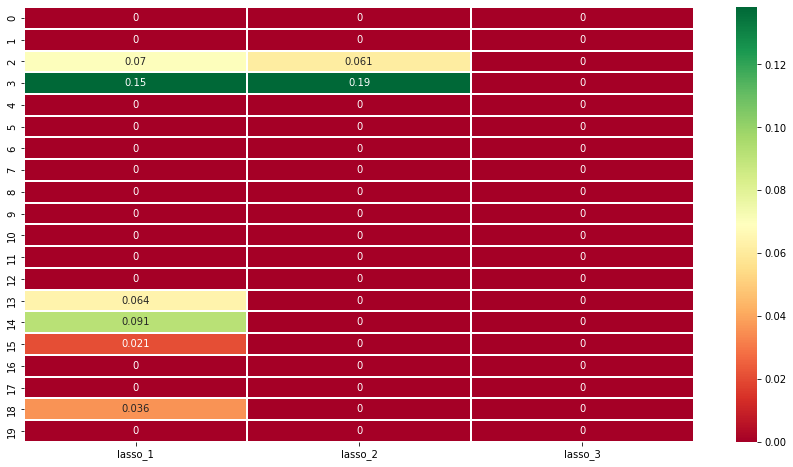

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
sns.heatmap(df_coefs_L.head(20).abs(), cmap ='RdYlGn', linewidths = 0.30, annot = True, robust=True);

In [ ]:
# Number of +ve Coefs
(df_coefs_L > 0).sum()

lasso_1    19
lasso_2     6
lasso_3     0
dtype: int64

__Lots of variables got eliminated in round 2 itself!. Better search more in lower ranges of lambda.__

### Gridsearch

We can't manually iterate over the values of alpha, so we use Gridsearch fom sklearn.model selection which tells us the best parameter

In [ ]:
# Grid Search LASSO
params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}

lasreg = Lasso(max_iter=10e5)

clf = GridSearchCV(estimator=lasreg, 
                   param_grid=params, 
                   cv=5, 
                   return_train_score=True, 
                   scoring="neg_mean_absolute_percentage_error")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=1000000.0),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
clf.cv_results_

{'mean_fit_time': array([2.48688183, 0.0906023 , 0.00619597, 0.00479913, 0.00419974,
        0.0034009 , 0.00360465, 0.00359864]),
 'std_fit_time': array([0.82473521, 0.0243357 , 0.00116688, 0.00097899, 0.0003996 ,
        0.00048893, 0.00048636, 0.00048897]),
 'mean_score_time': array([0.00259547, 0.00339727, 0.0028039 , 0.00220027, 0.00200014,
        0.00259981, 0.00219603, 0.0030005 ]),
 'std_score_time': array([0.00048763, 0.00049337, 0.00039976, 0.00040023, 0.000001  ,
        0.00049016, 0.00040135, 0.00063196]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.005},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 5}],
 'split0_test_score': array([-0.46553165, -0.46193666, -0.42594307, -0.42566613, -0.4818787 ,
        

In [ ]:
clf.best_estimator_

Lasso(alpha=0.001, max_iter=1000000.0)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.486882,0.824735,0.002595,0.000488,0.00001,{'alpha': 1e-05},-0.465532,-0.775321,-0.968740,-0.708884,-0.965591,-0.776814,0.186540,5,-0.268721,-0.242132,-0.263025,-0.219316,-0.257374,-0.250114,0.017764
1,0.090602,0.024336,0.003397,0.000493,0.0001,{'alpha': 0.0001},-0.461937,-0.510537,-0.785145,-0.457684,-0.641213,-0.571303,0.125840,4,-0.312901,-0.316401,-0.282434,-0.250980,-0.286620,-0.289867,0.023718
2,0.006196,0.001167,0.002804,0.000400,0.001,{'alpha': 0.001},-0.425943,-0.399162,-0.515838,-0.458799,-0.454236,-0.450796,0.038962,1,-0.378203,-0.369152,-0.334635,-0.365458,-0.348189,-0.359127,0.015646
3,0.004799,0.000979,0.002200,0.000400,0.005,{'alpha': 0.005},-0.425666,-0.400654,-0.459805,-0.519887,-0.505768,-0.462356,0.045507,2,-0.452724,-0.454908,-0.442072,-0.421219,-0.414220,-0.437029,0.016502
4,0.004200,0.000400,0.002000,0.000001,0.01,{'alpha': 0.01},-0.481879,-0.483469,-0.593181,-0.642285,-0.644748,-0.569112,0.072937,3,-0.557623,-0.574668,-0.536302,-0.529947,-0.520915,-0.543891,0.019574
5,0.003401,0.000489,0.002600,0.000490,0.1,{'alpha': 0.1},-0.827869,-0.941273,-1.312959,-1.272844,-1.176107,-1.106211,0.189777,6,-1.154555,-1.127589,-1.107593,-1.074646,-1.040406,-1.100958,0.039962
6,0.003605,0.000486,0.002196,0.000401,1,{'alpha': 1},-0.827869,-0.941273,-1.312959,-1.272844,-1.176107,-1.106211,0.189777,6,-1.154555,-1.127589,-1.107593,-1.074646,-1.040406,-1.100958,0.039962
7,0.003599,0.000489,0.003000,0.000632,5,{'alpha': 5},-0.827869,-0.941273,-1.312959,-1.272844,-1.176107,-1.106211,0.189777,6,-1.154555,-1.127589,-1.107593,-1.074646,-1.040406,-1.100958,0.039962


In [ ]:
# Evaluating the best alpha suggested by Gridsearch 
lasso = Lasso(alpha= 0.005, max_iter = 10e5) 
lasso.fit(X_train, y_train)

# Prediction alpha = 0.005
predictions_test_lasso = lasso.predict(X_test)
predictions_train_lasso = lasso.predict(X_train)

# Model Evaluation
evaluate_model(y_train, predictions_train_lasso, y_test, predictions_test_lasso)

MAE for train data :  0.128
MAE for test data :  0.135


MSE for train data :  0.026
MSE for test data :  0.03


MAPE for train data :  0.443
MAPE for test data :  0.509


Ridge Regression seems to do better in this case over LASSO regression.

Let's see which variables were retained by the model.

In [ ]:
clf.best_estimator_.coef_

array([-0.        ,  0.        ,  0.06973174, -0.14854122, -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.06398916, -0.0914011 ,
       -0.02092768,  0.        ,  0.        , -0.0358825 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.0265382 ,
        0.0152666 ,  0.        , -0.08861468,  0.        , -0.        ,
       -0.        , -0.        ,  0.01321184, -0.        , -0.08038065,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.20261078,
       -0.26900453, -0.        , -0.        , -0.        , -0.        ,
        0.07463924, -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.07324955,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.20

__Do a finer LASSO search__

In [ ]:
params = {"alpha": np.arange(0.0001, 0.01,.0001)}
params

{'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
        0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
        0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
        0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
        0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
        0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
        0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
        0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
        0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
        0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
        0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
        0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
        0.0097, 0.0098, 0.0099])}

In [ ]:
lassoreg = Lasso()
clf = GridSearchCV(estimator=lassoreg, param_grid=params, cv=5, return_train_score=True, scoring="neg_mean_absolute_percentage_error")
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.00...
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
clf.best_estimator_

Lasso(alpha=0.002)

In [ ]:
# Evaluating the best alpha suggested by Gridsearch 
lr = Lasso(alpha=0.002) 
lr.fit(X_train, y_train)

# Prediction alpha = 0.002
predictions_test_lr = lr.predict(X_test)
predictions_train_lr = lr.predict(X_train)

# Model Evaluation
evaluate_model(y_train, predictions_train_lr, y_test, predictions_test_lr)

MAE for train data :  0.12
MAE for test data :  0.127


MSE for train data :  0.023
MSE for test data :  0.029


MAPE for train data :  0.384
MAPE for test data :  0.431


We achieved 39% Test mape with Ridge Regression earlier. Not able to beat that!

## Elastic Net Regression

Cost Func:  
```
1 / (2 * n_samples) * ||y - Xw||^2_2 + 
alpha * l1_ratio * ||w||_1 + 
0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
```

where, 

__alpha is the constant that multiplies the penalty terms and l1_ratio is the mixing of L1 and L2 penalty.__


- When L1_Ratio = 0  --> L2 Penalty (Ridge Regression)
- When L1_Ratio = 1  --> L1 Penalty (Lasso Regression)

Let's start with the alpha & l1_ratio to be :

- alpha 0.2 and l1_ratio 0.2
- alpha 0.4 and l1_ratio 0.5
- alpha 0.6 and l1_ratio 0.8

### Elastic Net Regression alpha = 0.2, l1_ratio = 0.2

In [ ]:
en_1 = ElasticNet(alpha=0.2, l1_ratio=0.2)
en_1.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.2)

In [ ]:
# Prediction wiht alpha = 0.2, l1_ratio = 0.2
predictions_test_en1 = en_1.predict(X_test)
predictions_train_en1 = en_1.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_en1, y_test, predictions_test_en1)

MAE for train data :  0.213
MAE for test data :  0.226


MSE for train data :  0.064
MSE for test data :  0.071


MAPE for train data :  1.019
MAPE for test data :  1.169


### Elastic Net Regression alpha = 0.4, l1_ratio = 0.5

In [ ]:
en_2 = ElasticNet(alpha=0.4, l1_ratio=0.5)
en_2.fit(X_train, y_train)

ElasticNet(alpha=0.4)

In [ ]:
# Prediction wiht alpha = 0.4, l1_ratio = 0.5
predictions_test_en2 = en_2.predict(X_test)
predictions_train_en2 = en_2.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_en2, y_test, predictions_test_en2)

MAE for train data :  0.229
MAE for test data :  0.242


MSE for train data :  0.073
MSE for test data :  0.082


MAPE for train data :  1.101
MAPE for test data :  1.262


### Elastic Net Regression alpha = 0.6, l1_ratio = 0.8

In [ ]:
en_3 = ElasticNet(alpha=0.6, l1_ratio=0.8)
en_3.fit(X_train, y_train)

ElasticNet(alpha=0.6, l1_ratio=0.8)

In [ ]:
# Prediction wiht alpha = 0.6, l1_ratio = 0.8
predictions_test_en3 = en_3.predict(X_test)
predictions_train_en3 = en_3.predict(X_train)

In [ ]:
# Model Evaluation
evaluate_model(y_train, predictions_train_en3, y_test, predictions_test_en3)

MAE for train data :  0.229
MAE for test data :  0.242


MSE for train data :  0.073
MSE for test data :  0.082


MAPE for train data :  1.101
MAPE for test data :  1.262


### Gridsearch

We can't manually iterate over the values of alpha, so we use Gridsearch fom sklearn.model selection which tells us the best parameter

In [ ]:
params = {"alpha": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          "l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
en = ElasticNet()
clf = GridSearchCV(estimator=en, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             return_train_score=True)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00540023, 0.00439882, 0.00359945, 0.0032012 , 0.00400562,
        0.00360136, 0.00339956, 0.00360346, 0.00380106, 0.00319948,
        0.00560007, 0.00359955, 0.00380039, 0.00360327, 0.00320187,
        0.0040062 , 0.00440311, 0.0043982 , 0.00320334, 0.00419779,
        0.00479946, 0.00319948, 0.00340037, 0.00400395, 0.00360012,
        0.00319915, 0.00400119, 0.00340137, 0.00619984, 0.00420089,
        0.00419831, 0.00400076, 0.00299821, 0.00420489, 0.00440145,
        0.00320511, 0.00360174, 0.00420308, 0.00320225, 0.00380635,
        0.00500126, 0.00339808, 0.00440011, 0.00419836, 0.00419936,
        0.0035985 , 0.00500107, 0.00539966, 0.00380058, 0.00359998,
        0.00299921, 0.00380831, 0.00319657, 0.00340104, 0.00340004,
        0.00400066, 0.00400329, 0.00339923, 0.00360107, 0.00360217,
        0.00380244, 0.00339632, 0.00340261, 0.00339913, 0.00399957,
        0.00399289, 0.00360208, 0.00400434, 0.0044023 , 0.00379691,
        0.00460248, 0.00360065,

In [ ]:
clf.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
# Evaluating the best alpha and l1 ratio suggested by Gridsearch 
en = ElasticNet(alpha= 0.1, l1_ratio = 0.1) 
en.fit(X_train, y_train)

# Prediction
predictions_test_en = en.predict(X_test)
predictions_train_en = en.predict(X_train)

# Model Evaluation
evaluate_model(y_train, predictions_train_en, y_test, predictions_test_en)

MAE for train data :  0.153
MAE for test data :  0.163


MSE for train data :  0.034
MSE for test data :  0.037


MAPE for train data :  0.644
MAPE for test data :  0.746
